# Overview

In this week's numerical problem you will use skills from previous week's assignments to do something slightly new. In this assignment, you will work with:
1- Arrays
2- Plots


## Arrays

Arrays are lists of numbers that can be used in mathematical calculations.  Here are two ways to create arrays in python:


In [7]:
# First way
from numpy import arange
myarray = arange(0,5,.1)
print(myarray)

#Second way

from numpy import array
anotherArray = array([3,4,1,5,2.2])
print(anotherArray)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9]
[3.  4.  1.  5.  2.2]


In the first method, you created an array of numbers starting at 0 and ending at 5, with a step size of 0.1 .  In the second method, you turned a list into an array.   When you read data in from a file using the 'loadtxt' command, it is also stored in an array:


In [9]:
from numpy import loadtxt
data = loadtxt('https://lancejnelson.github.io/PH121/files/numericalHW/drops.txt')
#print(data) #printing the data was messying the printout. 

The cool thing about arrays is that you can do math with them and python knows to perform the calculation on all of the numbers in the array.  For example:


In [10]:
from numpy import array

a = array([4,3,2])
b = a**2  # If I square the array it knows to square all of the numbers
print(b)
from numpy import cos

c = cos(b)  # I can even calculate trig function across the array.
print(c)

[16  9  4]
[-0.95765948 -0.91113026 -0.65364362]


## Histograms

Histograms are valuable plots when you have a lot of data and want to visualize the mean and spread in the data.  For example, let's say that you had collected the heights of all students at BYU-Idaho and you wanted to visualize that data.  The cell below will show you how to build a histogram:

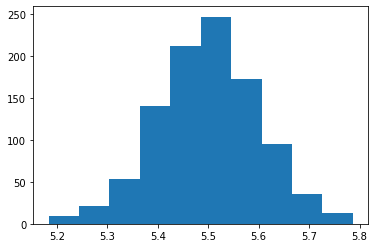

In [11]:
# Generating fake data.  Don't worry about the next two lines.
from numpy.random import normal
heights = normal(5.5,0.1,size = 1000)

# This is how you make the histogram.
from matplotlib import pyplot
pyplot.hist(heights)
pyplot.show()

From the histogram, you can quickly summarize the data:  The most likely height is somewhere near 5.5 ft or 5' 6".  Very few people are shorter than 5.3 feet or taller than 5.7 feet.  Most students' height is somewhere between 5.4 and 5.6 feet.   


# Your Problem.  

Use the skills you've gained to solve the problem below:


You are working for a rifle manufacturer and have been tasked with testing the consis- tency of the muzzle velocity on a particular rifle. You orient the rifle horizontally and aim it at a target located 50 meters away. You proceed to fire the rifle 1000 times, each time measuring the distance below the aim point (in centimeters) where the bullet hits.

(download the data file [here](https://lancejnelson.github.io/PH121/files/numericalHW/drops.txt).  Or you can just paste the url into the 'loadtxt' command like I did above.)

1- On a piece of paper, work out the kinematics to solve for the muzzle velocity.

2- Read in the data and calculate the muzzle velocity for all 1000 trials.

3- Make a histogram of the muzzle velocities.

4- Comment on the appropriate range of muzzle velocities that you would feel comfortable reporting to your boss.

![title](/Users/addisonballif/Desktop/byui/physics121/week5/muzzle_image.png)

$$
\begin{aligned}
-h_f & = \frac{a_y}{2} t^2 + v_{0y} t \\ 
-h_f & = \frac{-g}{2} t^2 \\ 
t & = \sqrt{\frac{2 h_f}{g}} \\
\frac{d}{t} & = v_{0x} \\
\frac{d}{\sqrt{\frac{2 h_f}{g}}} & = v_0 \\
v_0 & = d \sqrt{\frac{g}{2 h_f}}
\end{aligned}
$$

Now we have the equation to find our array of muzzle velocities. 


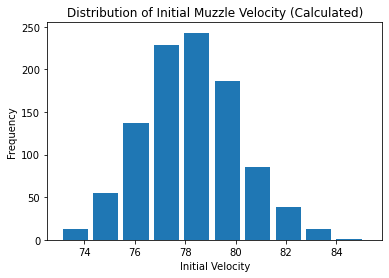

The distribution of initial velocities has a mean of 78.341 m/s with a standard deviation of 1.907 m/s. 
The muzzle velocity is between 74.526 to 82.155 m/s 95% of the time. 


In [12]:
from numpy import loadtxt, mean, std, sqrt
from matplotlib import pyplot

#first load the hf data
hf = loadtxt('https://lancejnelson.github.io/PH121/files/numericalHW/drops.txt')

#define constants
d = 50 #m
g = 9.8 #m/s^2

#calculate v0 using equation above
v0 = d*sqrt(g/(2*hf))

#plot histogram of h0 values
pyplot.hist(v0, 10, width=1)
pyplot.title("Distribution of Initial Muzzle Velocity (Calculated)")
pyplot.ylabel('Frequency')
pyplot.xlabel('Initial Velocity')
pyplot.show()

print(f'The distribution of initial velocities has a mean of {mean(v0):.3f} m/s with a standard deviation of {std(v0):.3f} m/s. ')
print(f'The muzzle velocity is between {(mean(v0)-2*std(v0)):.3f} to {(mean(v0)+2*std(v0)):.3f} m/s 95% of the time. ')